In [66]:
import numpy as np
import pandas as pd
data = pd.read_csv('./train.csv', encoding = 'big5')
# data.index = pd.to_datetime(data.index)
# len(data[data.index.month == 3])/18
# data[data.index == '2014/1/1']

data = data.iloc[:, 3:]
data[data == 'NR'] = 0
raw_data = data.to_numpy()

# Reshaping month_data into dictionary
month_data = {}
for month in range(12):
    sample = np.empty([18, 480])
    for day in range(20):
        sample[:, 24 * day: 24 * (day + 1)] = raw_data[18 * (20 * month + day): 18 * (20 * month + day + 1), :]
    month_data[month] = sample


# Select 9 prior data for a single x, reshape dictionary into a single table
x = np.empty([12 * 471, 18 * 9], dtype = float)
y = np.empty([12 * 471, 1], dtype = float)
for month in range(12):
    for day in range(20):
        for hour in range(24):
            if day == 19 and hour > 14:
                continue
            x[month*471 + day*24 + hour, :] = month_data[month][:, day*24 + hour:day*24 + hour + 9].reshape(1, -1)
            y[month*471 + day*24 + hour, 0] = month_data[month][9, day*24 + hour + 9]

# Normalization
mean_x = np.mean(x, axis = 0)
std_x = np.std(x, axis = 0)
for i in range(len(x)): #471*12
    for j in range(len(x[0])): #9*18
        x[i][j] = (x[i][j]-mean_x[j]) / (std_x[j] + 1e-8)
        
# Initial x = 1 for constant w0
x = np.concatenate((np.ones([471 * 12, 1]), x), axis = 1)

# Training / Testing (val) split
import math
x_train_set = x[:math.floor(len(x)*0.8), :]
y_train_set = y[:math.floor(len(y)*0.8)]
x_validation_set = x[math.floor(len(x)*0.8):, :]
y_validation_set = y[math.floor(len(y)*0.8):]
print(len(x_train_set))
print(len(y_train_set))
print(len(x_validation_set))
print(len(y_validation_set))


# Gradient descent
dim = 18 * 9 + 1

# Initial wx = 0
w = np.zeros([dim, 1])



# Hyperparameters
learning_rate = 100
iter_time = 3000
adagrad = np.zeros([dim, 1])
eps = 0.0000000001

# Iteration (Using training set)
for t in range(iter_time):
    loss = np.sqrt(np.sum((np.dot(x_train_set, w) - y_train_set) ** 2) / (471 * 12))
    if(t%100==0):
        print(str(t) + ":" + str(loss))
    gradient = 2 * (np.dot(x_train_set.transpose(), (np.dot(x_train_set, w)-y_train_set)))
    adagrad += gradient ** 2
    w = w - learning_rate*(gradient / np.sqrt(adagrad + eps))
    
# # Iteration (Using total data)
# for t in range(iter_time):
#     loss = np.sqrt(np.sum((np.dot(x, w) - y) ** 2) / (471 * 12))
#     if(t%100==0):
#         print(str(t) + ":" + str(loss))
#     gradient = 2 * (np.dot(x.transpose(), (np.dot(x, w)-y)))
#     adagrad += gradient ** 2
#     w = w - learning_rate*(gradient / np.sqrt(adagrad + eps))   

4521
4521
1131
1131
0:24.36221492236629
100:20.323592857064806
200:9.326264367842654
300:6.829236033131877
400:6.126311161034313
500:5.829997079386119
600:5.657451729508253
700:5.540029102318681
800:5.4548220536052705
900:5.391104683551582
1000:5.342550285086801
1100:5.304978777045437
1200:5.2754885914444785
1300:5.252018857608817
1400:5.233086536858533
1500:5.2176141110659175
1600:5.204811955012922
1700:5.194096448502685
1800:5.185032348171185
1900:5.177291941975752
2000:5.170625938586661
2100:5.1648426193904795
2200:5.159792838414687
2300:5.155359178924333
2400:5.151448075935698
2500:5.14798406277077
2600:5.144905544313746
2700:5.142161671775494
2800:5.139710015389429
2900:5.1375148176499446


In [67]:
# Calculating Val MAPE
from sklearn.metrics import mean_absolute_percentage_error

y_validation_set_pred = np.dot(x_validation_set, w)
mean_absolute_percentage_error(y_validation_set, y_validation_set_pred)

839096374196223.6

In [68]:
list(np.concatenate((y_validation_set, y_validation_set_pred),axis=1))

[array([13.        , 13.90243253]),
 array([24.        , 15.95222625]),
 array([22.        , 19.48174486]),
 array([21.        , 22.65089592]),
 array([18.        , 16.77746446]),
 array([18.        , 17.63034979]),
 array([28.       , 18.6350665]),
 array([26.       , 28.5827573]),
 array([31.       , 29.5357165]),
 array([30.        , 29.74852733]),
 array([34.        , 33.51673597]),
 array([36.      , 35.231585]),
 array([35.        , 37.47267703]),
 array([38.        , 36.43211302]),
 array([45.        , 38.94749478]),
 array([56.       , 48.5122681]),
 array([56.       , 53.3842182]),
 array([43.        , 50.17511577]),
 array([35.        , 37.79983102]),
 array([26.        , 30.21427923]),
 array([21.        , 26.80722881]),
 array([ 7.        , 18.02056161]),
 array([17.        ,  9.59220093]),
 array([20.       , 18.8204063]),
 array([20.       , 25.4648875]),
 array([18.        , 15.52301739]),
 array([16.        , 15.91549504]),
 array([16.        , 16.67769985]),
 array([16

<Axes: >

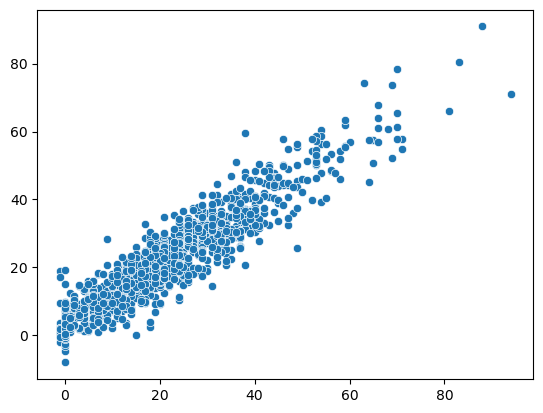

In [69]:
import seaborn as sns
sns.scatterplot(x=y_validation_set[:,0], y=y_validation_set_pred[:,0])

In [70]:
# Read testing 
test_data = pd.read_csv('./test.csv', header = None, encoding = 'big5')
test_data = test_data.iloc[:, 2:]

# Data cleaning
test_data[test_data=='NR'] = 0

np_test_data = test_data.to_numpy()
test_x = np.empty([240, 9*18])
for i in range(240):
    test_x[i, :] = np_test_data[18*i:18*(i+1), :].reshape(1, -1)


for i in range(240):
    for j in range(9*18):
        test_x[i, j] = (test_x[i, j] - mean_x[j]) / std_x[j]
test_x = np.concatenate((np.ones([240, 1]), test_x), axis = 1).astype(float)

ans_y = np.dot(test_x, w)
print(ans_y)

[[  6.36367359]
 [ 17.72857135]
 [ 24.22917762]
 [  7.22613788]
 [ 27.51072738]
 [ 22.37127624]
 [ 24.11922659]
 [ 30.992049  ]
 [ 16.86007394]
 [ 59.59677692]
 [ 12.57628515]
 [  9.59858681]
 [ 62.31153277]
 [ 53.33967258]
 [ 21.84194079]
 [ 12.05713535]
 [ 32.17216019]
 [ 66.78320392]
 [ -1.23857821]
 [ 16.99565909]
 [ 41.94922028]
 [ 72.0585099 ]
 [  8.98804634]
 [ 17.77424353]
 [ 14.85006603]
 [ 38.29493754]
 [ 14.26196519]
 [ 73.85686095]
 [  7.16415204]
 [ 55.72091907]
 [ 23.80936148]
 [  9.35543964]
 [  3.20014646]
 [ 19.46629868]
 [ 29.81107366]
 [ 37.04875254]
 [ 43.26873749]
 [ 30.58799085]
 [ 42.02096172]
 [ 35.40195044]
 [  6.93064573]
 [ 41.03175397]
 [ 31.4957115 ]
 [ 50.9628332 ]
 [ 17.47723327]
 [ 35.26791999]
 [ 24.17515112]
 [  9.49712628]
 [ 25.33255154]
 [ 32.11796351]
 [ 21.38881623]
 [  8.70672406]
 [ 21.8241708 ]
 [ 53.32513437]
 [ 16.47157649]
 [ 35.90514037]
 [ 32.08575597]
 [ 21.90766845]
 [ 58.40387801]
 [ 22.14252375]
 [ 15.06367838]
 [ 41.20958491]
 [ 12.58